In [1]:
from pathlib import Path
from operator import itemgetter

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from graspy.datasets import load_drosophila_left, load_drosophila_right
from graspy.plot import heatmap
from graspy.utils import get_lcc

%matplotlib inline

In [2]:
right_adj, right_class = load_drosophila_right(return_labels=True)
left_adj, left_class = load_drosophila_left(return_labels=True)

Left MB, original (from MBstructure repo)
Number of edges: 7425
Number of vertices: 209


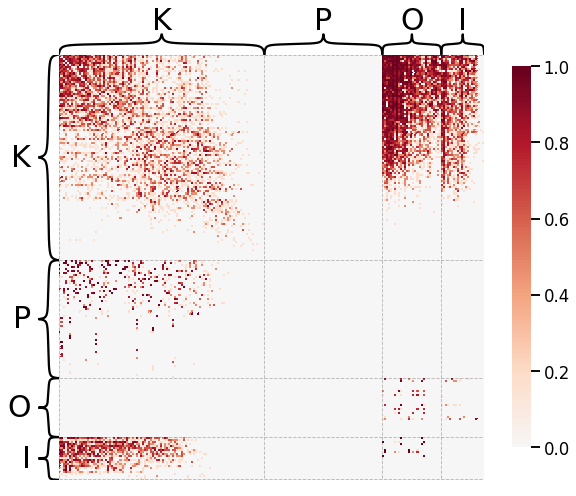

In [3]:
# heatmap(left_adj, inner_hier_labels=left_class)
heatmap(left_adj, inner_hier_labels=left_class, transform="simple-nonzero")
n_edges = np.count_nonzero(left_adj)
n_verts = left_adj.shape[0]
print("Left MB, original (from MBstructure repo)")
print(f"Number of edges: {n_edges}")
print(f"Number of vertices: {n_verts}");

right MB, original (from MBstructure repo)
Number of edges: 7536
Number of vertices: 213


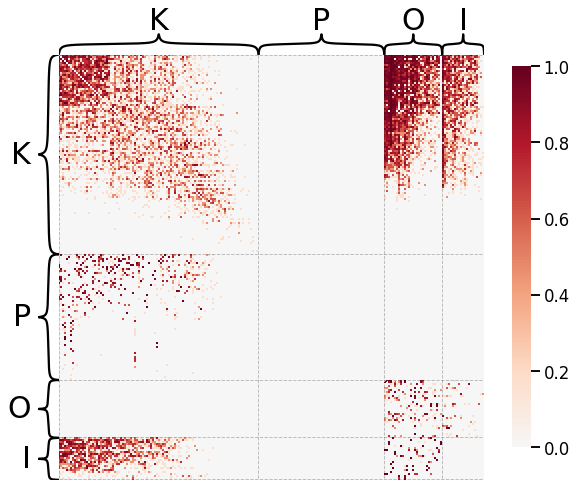

In [4]:
# heatmap(right_adj, inner_hier_labels=right_class)
heatmap(right_adj, inner_hier_labels=right_class, transform="simple-nonzero")
n_edges = np.count_nonzero(right_adj)
n_verts = right_adj.shape[0]
print("right MB, original (from MBstructure repo)")
print(f"Number of edges: {n_edges}")
print(f"Number of vertices: {n_verts}");

# New MB connectomes from 0424_mw_brain_neurons

Remap the cell labels from the new data

"MW label" -> "My label for plotting""
---------------

"DANs" -> "I" 

"KCs" -> "KC"

"MBINs" -> "I"

"MBON" -> "O"

"MBON; CN" -> "O"

"OANs" -> "I"

"ORN mPNs" -> "P"

"ORN uPNs" -> "P"

"tPNs" -> "P"

"vPNs" -> "P"

In [5]:
data_path = Path('./private_data/20190424_mw_brain_neurons')
adj_df = pd.read_csv(data_path / "brain-connectivity-matrix.csv", index_col=0)
adj = adj_df.values

meta_df = pd.read_csv(data_path / "brain_meta-data.csv")
meta_df.set_index("ID", inplace=True)
meta_inds = meta_df.index.values
adj_inds = adj_df.index.values

# check that they are sorted the same
(meta_inds == adj_inds).all()


#%% Look at the adj_mat for identified cells by hemisphere and cell type
side_labels = meta_df["Hemisphere"].values

# get the subset of cells with type annotations
identified_meta_df = meta_df[meta_df["Class"] != "Unidentified"]
identified_class = identified_meta_df["Class"].values
identified_hemisphere = identified_meta_df["Hemisphere"].values
identified_inds = identified_meta_df.index.values


True

In [6]:
identified_right_meta_df = identified_meta_df[
    identified_meta_df["Hemisphere"] == "right"
]
inds = identified_right_meta_df.index.values
graph_mask = np.isin(adj_inds, inds)
right_adj = adj[np.ix_(graph_mask, graph_mask)]
# right_adj, right_lcc_inds = get_lcc(right_adj, return_inds=True)

identified_left_meta_df = identified_meta_df[
    identified_meta_df["Hemisphere"] == "left"
]
inds = identified_left_meta_df.index.values
graph_mask = np.isin(adj_inds, inds)
left_adj = adj[np.ix_(graph_mask, graph_mask)]
# left_adj, left_lcc_inds = get_lcc(left_adj, return_inds=True)

name_map = {
    "CN": "C/LH",
    "DANs": "I",
    "KCs": "KC",
    "LHN": "C/LH",
    "LHN; CN": "C/LH",
    "MBINs": "I",
    "MBON": "O",
    "MBON; CN": "O",
    "OANs": "I",
    "ORN mPNs": "P",
    "ORN uPNs": "P",
    "tPNs": "P",
    "vPNs": "P",
}
# right_class = identified_right_meta_df.iloc[right_lcc_inds, 2].values
right_class = identified_right_meta_df.iloc[:, 2].values
right_class = np.array(itemgetter(*right_class)(name_map))
# left_class = identified_left_meta_df.iloc[left_lcc_inds, 2].values
left_class = identified_left_meta_df.iloc[:, 2].values
left_class = np.array(itemgetter(*left_class)(name_map))

# heatmap(right_adj, inner_hier_labels=right_class, transform='simple-nonzero', hier_label_fontsize=22)
# heatmap(left_adj, inner_hier_labels=left_class, transform='simple-nonzero', hier_label_fontsize=22);

left MB, MW 0424
Number of edges: 6661
Number of vertices: 186

right MB, MW 0424
Number of edges: 6293
Number of vertices: 182


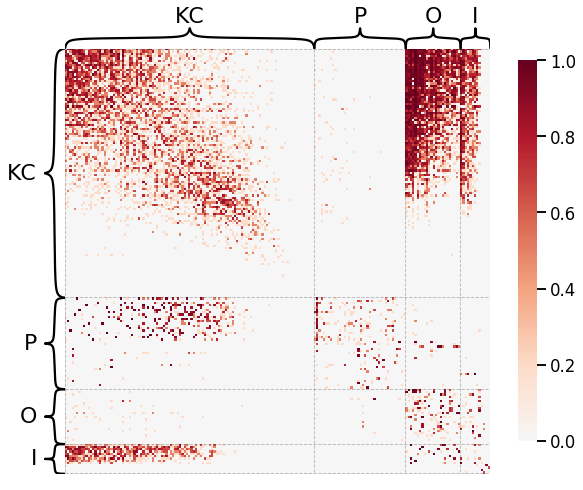

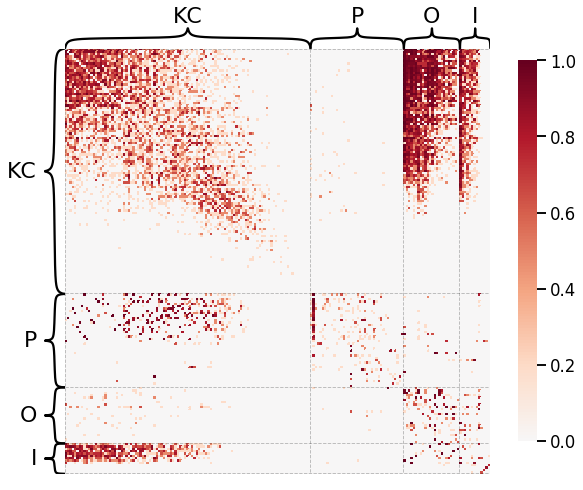

In [7]:
mb_classes = np.array(['KC','P','O','I'])
left_mb_inds = np.isin(left_class, mb_classes)
right_mb_inds = np.isin(right_class, mb_classes)
left_mb_adj = left_adj[np.ix_(left_mb_inds, left_mb_inds)]
right_mb_adj = right_adj[np.ix_(right_mb_inds, right_mb_inds)]
left_mb_class = left_class[left_mb_inds]
right_mb_class = right_class[right_mb_inds]


n_edges = np.count_nonzero(left_mb_adj)
n_verts = left_mb_adj.shape[0]
print("left MB, MW 0424")
print(f"Number of edges: {n_edges}")
print(f"Number of vertices: {n_verts}")
heatmap(left_mb_adj, inner_hier_labels=left_mb_class, transform='simple-nonzero', hier_label_fontsize=22)

print()

n_edges = np.count_nonzero(right_mb_adj)
n_verts = right_mb_adj.shape[0]
print("right MB, MW 0424")
print(f"Number of edges: {n_edges}")
print(f"Number of vertices: {n_verts}")
ax = heatmap(right_mb_adj, inner_hier_labels=right_mb_class, transform='simple-nonzero', hier_label_fontsize=22);